SimpleRNN for Time Series prediction


In [ ]:
import tensorflow as tf
print(tf.__version__)

2.6.0


In [9]:
from tensorflow.keras.layers import Input, Dense, SimpleRNN, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

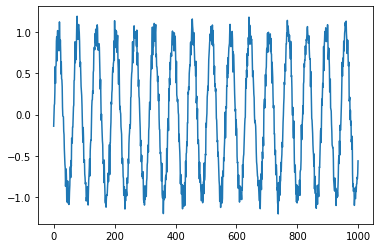

In [6]:
# Making the original data
# Note: np.random to add noise to the data

series = np.sin(0.1 * np.arange(1000)) + np.random.randn(1000) * 0.1

# Plot
plt.plot(series)
plt.show()

In [7]:
# Build the dataset from the series
# Use the past T values to predict the next value
T = 10
D = 1
X = []
Y = []

for t in range(len(series) - T):
  x = series[t:t+T]
  X.append(x)
  y = series[t+T]
  Y.append(y)

X = np.array(X).reshape(-1, T, 1) # Now the data should be N x T x D
Y = np.array(Y)
N = len(X)

print("X.shape", X.shape, "Y.shape", Y.shape)

X.shape (990, 10, 1) Y.shape (990,)


In [16]:
# Autoregressive RNN model
i = Input(shape = (T, 1))
# We can play with the activation here (relu gives bad results)
x = SimpleRNN(15, activation='relu')(i)
x = Dense(1)(x)

model = Model(i, x)
model.compile(loss='mse', optimizer=Adam(lr = 0.001))

# Train the RNN
r = model.fit(X[:-N//2], Y[:-N//2], epochs=80, validation_data=(X[-N//2:], Y[-N//2:]))

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/80
16/16 [==============================] - 1s 18ms/step - loss: 0.8074 - val_loss: 0.6351
Epoch 2/80
16/16 [==============================] - 0s 9ms/step - loss: 0.5241 - val_loss: 0.4104
Epoch 3/80
16/16 [==============================] - 0s 6ms/step - loss: 0.3375 - val_loss: 0.2564
Epoch 4/80
16/16 [==============================] - 0s 6ms/step - loss: 0.2221 - val_loss: 0.1813
Epoch 5/80
16/16 [==============================] - 0s 5ms/step - loss: 0.1632 - val_loss: 0.1293
Epoch 6/80
16/16 [==============================] - 0s 5ms/step - loss: 0.1142 - val_loss: 0.0871
Epoch 7/80
16/16 [==============================] - 0s 5ms/step - loss: 0.0716 - val_loss: 0.0463
Epoch 8/80
16/16 [==============================] - 0s 9ms/step - loss: 0.0358 - val_loss: 0.0270
Epoch 9/80
16/16 [==============================] - 0s 6ms/step - loss: 0.0249 - val_loss: 0.0224
Epoch 10/80
16/16 [==============================] - 0s 6ms/step - loss: 0.0217 - val_loss: 0.0194
Epoch 11/80
16/16 

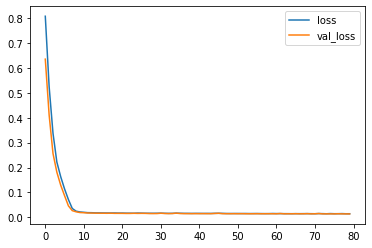

In [17]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

In [18]:
# "Wrong" forecast using true targets

validation_target = Y[-N//2:]
validation_predictions = []

# index of first validation input
i = -N//2

while len(validation_predictions) < len(validation_target):
  p = model.predict(X[i].reshape(1, -1, 1))[0, 0] # 1x1 array -> scalar
  i += 1

  # update the predictions list
  validation_predictions.append(p)

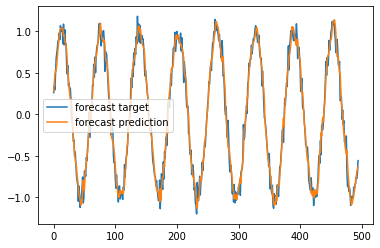

In [19]:
plt.plot(validation_target, label='forecast target')
plt.plot(validation_predictions, label='forecast prediction')
plt.legend()

In [20]:
# Forcesat future values (using only self-predictions for making future predictions)

validation_target = Y[-N//2:]
validation_predictions = []

# First validation input
last_x = X[-N//2] # 1D array of lenght T

while len(validation_predictions) < len(validation_target):
  p = model.predict(last_x.reshape(1, -1, 1))[0, 0] # 1x1 array -> scalar

  # update the predictions list
  validation_predictions.append(p)

  # make the new input
  last_x = np.roll(last_x, -1)
  last_x[-1] = p 

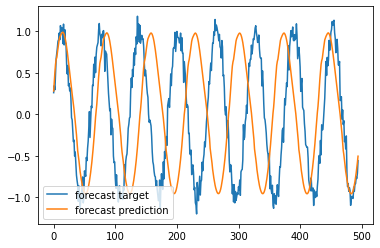

In [21]:
plt.plot(validation_target, label='forecast target')
plt.plot(validation_predictions, label='forecast prediction')
plt.legend()